In [4]:
import pandas as pd
import re
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.ticker as mtick

results = pd.read_excel(".//Dataset for Fig_5.xlsx")
results.head()

,Database,Link,result
0,MFA Spokesperson,http://world.people.com.cn/n/2015/0327/c1002-2...,200
1,MFA Spokesperson,http://new.fmprc.gov.cn/web/fyrbt_673021/jzhsl...,200
2,MFA Spokesperson,http://world.people.com.cn/n/2013/0228/c157278...,200
3,MFA Spokesperson,http://new.fmprc.gov.cn/web/fyrbt_673021/dhdw_...,200
4,MFA Spokesperson,http://new.fmprc.gov.cn/web/fyrbt_673021/dhdw_...,200


# Transform features

This section applies the following rules:
- 404 results are changed into "document unavailable due to website update" if at least 50% of the results from that website are a 404
- Else, 404 results become "document unavailable" (removed)

In [5]:
r = pd.DataFrame()

# iterate through each unique database slice of data
for database in results["Database"].unique():
    results_classified = []
    df = results.loc[results["Database"] == database].reset_index(drop=True)
    df_404 = df.loc[df["result"].astype(str) == "404"].reset_index(drop=True)
    if len(df_404) / len(df) > 0.5:
        for row in df["result"]:
            if str(row) == "404":
                results_classified.append("document unavailable due to website update")
            elif str(row) == "webpage unavailable":
                results_classified.append("webpage unavailable")
            else:
                results_classified.append("document available")
    else:
        for row in df["result"]:
            if str(row) == "404":
                results_classified.append("document removed")
            elif str(row) == "webpage unavailable":
                results_classified.append("webpage unavailable")
            else:
                results_classified.append("document available")
    
    df["result"] = results_classified
    r = pd.concat([r, df])
    
# evaluate all at once: if > 30 = 404:
# website change
# else:
# keep 404
r = r[["Link", "result"]]
grouped = r.groupby("result").count().unstack(fill_value=0)
grouped

      result                                    
Link  document available                            3292
      document removed                                78
      document unavailable due to website update     317
      webpage unavailable                            418
dtype: int64

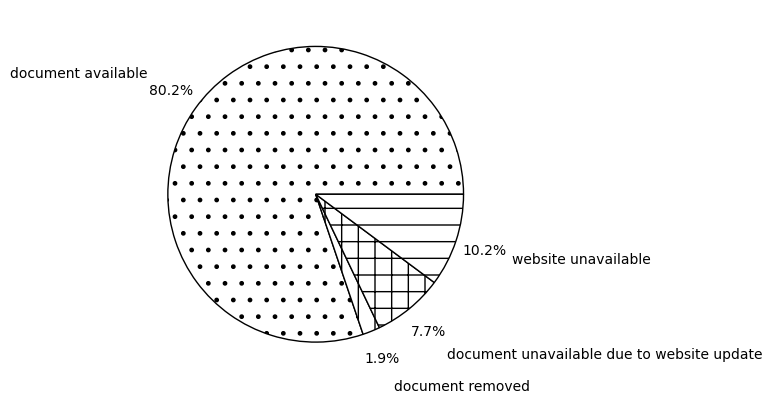

In [10]:
fig, axs = plt.subplots()

axs.pie(grouped, 
        labels=["document available", "document removed",
                         "document unavailable due to website update","website unavailable"],
        autopct='%1.1f%%',
        colors = ['white','white','white','white'],
        hatch=['.', '|', '+', '-'],
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' },
        #frame=True,
        pctdistance=1.2, labeldistance=1.4)
plt.savefig('Fig_5.png', dpi=600)